<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/8.Machine_Learning/06_classifiers_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Evaluacion de clasificadores



Vamos a crear un conjunto de datos a partir de 2 distribuciones. Cada distribución se etiqueta con una clase. Los valores de ambas se deben cruzar para simular el problema que queremos definir.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
total_p = 1000
total_n = 1000
px = [np.random.normal(10,3) for _ in range(total_p)]
nx = [np.random.normal(20,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

In [3]:
x

array([10.5213653 , 10.39173922, 10.35467008, ..., 23.54744108,
       15.58458089, 19.58383811])

(array([  6.,   5.,   6.,   6.,  22.,  29.,  40.,  54.,  63.,  78.,  99.,
        104., 114.,  93.,  91.,  73.,  53.,  52.,  53.,  47.,  75.,  74.,
         90.,  99., 104., 105.,  95.,  82.,  66.,  40.,  27.,  22.,  14.,
          9.,   3.,   3.,   1.,   2.,   0.,   1.]),
 array([ 0.9589891 ,  1.73326432,  2.50753954,  3.28181477,  4.05608999,
         4.83036522,  5.60464044,  6.37891567,  7.15319089,  7.92746612,
         8.70174134,  9.47601657, 10.25029179, 11.02456702, 11.79884224,
        12.57311747, 13.34739269, 14.12166792, 14.89594314, 15.67021836,
        16.44449359, 17.21876881, 17.99304404, 18.76731926, 19.54159449,
        20.31586971, 21.09014494, 21.86442016, 22.63869539, 23.41297061,
        24.18724584, 24.96152106, 25.73579629, 26.51007151, 27.28434674,
        28.05862196, 28.83289718, 29.60717241, 30.38144763, 31.15572286,
        31.92999808]),
 <a list of 40 Patch objects>)

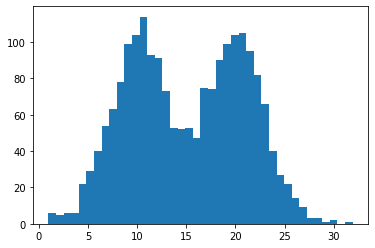

In [4]:
plt.hist(x,bins=40)



Aunque se perciba todo del mismo tipo, tenemos presentes las clases verdaderas

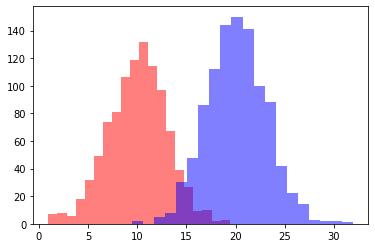

In [5]:
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
plt.show()



# 1 modelo simple



Creemos un clasificador muy simple, que divide las clases entre n y p, por la mitad de sus medias. Es decir que indique true para cada valor que es menor que la mitad.

In [6]:
def model(x,threshold):
    model_map = {True:"p",False:"n"}
    result = x<threshold
    result = np.vectorize(model_map.get)(result)
    return result

first_model_threshold = 15
testx = np.arange(1,30)
model(testx,threshold=first_model_threshold)

array(['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p',
       'p', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n'], dtype='<U1')



Predecimos con nuestro modelo para comprobar su precisión, sobre las clases asignadas

In [7]:
class_predicted = model(x,15)



# Definir metricas



Si contamos en términos generales cuántas se han acertado, es decir, bien clasificadas, se han acertado casi todas. esta es la métrica precision (accuracy).

In [8]:
sum(classes == class_predicted)/len(classes)

0.96

In [9]:
def accuracy(classes,predicted,positive_class,debug=True):
    if not debug:
        print("Simple implementation")
    return sum(classes == predicted)/len(classes)

In [10]:
accuracy(classes=classes,predicted=class_predicted,positive_class="p")

0.96

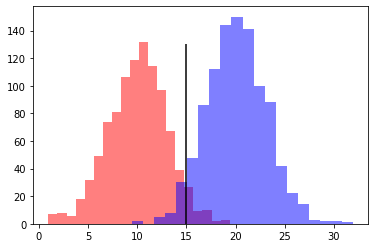

In [11]:
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
plt.vlines(first_model_threshold,0,130)
plt.show()



¿Cómo de bueno ha sido distinguiendo las muestras p, de las n ? Para esto necesitamos reflejar sensibilidad (recall) y especificidad (precission)  

Para la Sensibilidad necesitamos dividir todas las clasificadas como p, entre las que existen.

In [12]:
sum((class_predicted == "p") & (classes=="p")) / sum(classes=="p")

0.958

In [13]:
def recall(classes, predicted, positive_class):
    return sum((predicted == positive_class) & (classes==positive_class)) / sum(classes==positive_class)

In [14]:
recall(classes=classes,predicted=class_predicted,positive_class="p")

0.958



Y para la espeficididad, de las que se han señalado como p, cuales lo son realmente

In [15]:
sum((class_predicted == "p") & (classes=="p")) /  sum(class_predicted=="p")

0.9618473895582329

In [16]:
def specificity(classes, predicted, positive_class):
    return sum((predicted == positive_class) & (classes==positive_class)) / sum(predicted==positive_class)

In [17]:
specificity(classes, class_predicted, "p")

0.9618473895582329



# 3 modelos simples

In [18]:
def model_1(x):
    return model(x,threshold=12.5)
def model_2(x):
    return model(x,threshold=15)
def model_3(x):
    return model(x,threshold=17.5)

In [19]:
class_predicted_1 = model_1(x)
class_predicted_2 = model_2(x)
class_predicted_3 = model_3(x)



modelo 1

In [20]:
print("Precision",accuracy(classes=classes,predicted=class_predicted_1,positive_class="p"))
print("Sensitivity",recall(classes=classes,predicted=class_predicted_1,positive_class="p"))
print("Specificity",specificity(classes=classes,predicted=class_predicted_1,positive_class="p"))

Precision 0.8985
Sensitivity 0.801
Specificity 0.9950310559006211




modelo 2

In [21]:
print("Precision",accuracy(classes=classes,predicted=class_predicted_2,positive_class="p"))
print("Sensitivity",recall(classes=classes,predicted=class_predicted_2,positive_class="p"))
print("Specificity",specificity(classes=classes,predicted=class_predicted_2,positive_class="p"))

Precision 0.96
Sensitivity 0.958
Specificity 0.9618473895582329




modelo 3

In [22]:
print("Precision",accuracy(classes=classes,predicted=class_predicted_3,positive_class="p"))
print("Sensitivity",recall(classes=classes,predicted=class_predicted_3,positive_class="p"))
print("Specificity",specificity(classes=classes,predicted=class_predicted_3,positive_class="p"))

Precision 0.901
Sensitivity 0.995
Specificity 0.8375420875420876


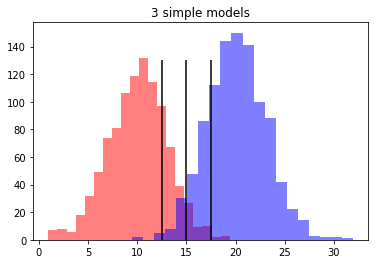

In [23]:
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
plt.title("3 simple models")
plt.vlines(12.5,0,130)
plt.vlines(15,0,130)
plt.vlines(17.5,0,130)

plt.show()



# muchos modelos simples



Creamos ahora "modelos" con unmbrales del 5 al 25 de 2 en dos, e introducimos las métricas en listas para comprobar como de bien evolucionan las 3 métricas

In [24]:
thresholds = np.arange(5,27,2)
thresholds

array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])

In [25]:
predictions = [model(x,threshold=t) for t in thresholds]
predictions

[array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'n', 'p', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'n', 'p', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'n', 'p', 'p'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'n', 'p', 'p'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'p', 'p', 'p'], dtype='<U1')]

In [26]:
accuracies = [accuracy(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
recalls = [recall(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
specificities = [specificity(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
    

In [27]:
recalls

[0.053, 0.154, 0.353, 0.624, 0.846, 0.958, 0.992, 0.998, 1.0, 1.0, 1.0]

In [28]:
specificities

[1.0,
 1.0,
 1.0,
 0.9968051118210862,
 0.9917936694021102,
 0.9618473895582329,
 0.8648648648648649,
 0.7316715542521994,
 0.6153846153846154,
 0.5455537370430987,
 0.5133470225872689]

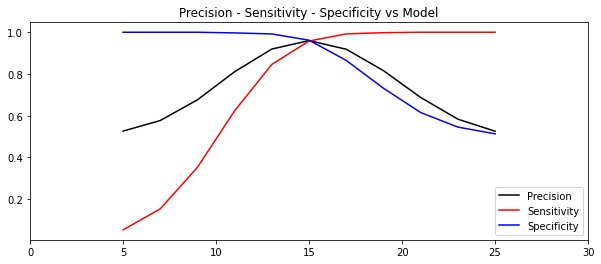

In [29]:
plt.figure(figsize=[10,4])
plt.xlim([0,30])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")


plt.show()

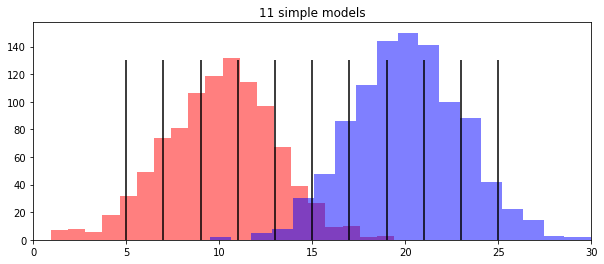

In [30]:
plt.figure(figsize=[10,4])
plt.xlim([0,30])

plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
for t in thresholds:
    plt.vlines(t, 0, 130)
plt.title("11 simple models")
plt.show()



# ROC



para N modelos distintos, cada uno posiblemente con un nivel de umbral de aceptación de la clase positiva, se representan sus valores de True Positive Rate y False Positive Rate.

TPR = De los casos seleccionados, tasa de los que eran realmente positivos  
FPR = De los casos seleccionados, tasa de los que se han dado por positivos pero no lo eran


In [31]:
TPR = recalls

FPR = 1 - np.array(specificities)

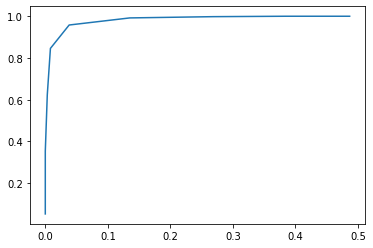

In [32]:
plt.plot(FPR,TPR)
plt.show()



# Otras distribuciones



## Clases desequilibradas

In [33]:
total_p = 100
total_n = 1000
px = [np.random.normal(10,3) for _ in range(total_p)]
nx = [np.random.normal(20,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

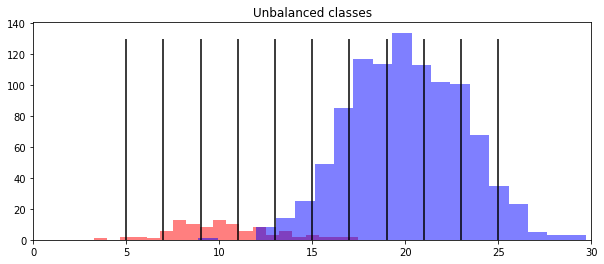

In [34]:
plt.figure(figsize=[10,4])
plt.xlim([0,30])
plt.title("Unbalanced classes")
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
for t in thresholds:
    plt.vlines(t, 0, 130)

plt.show()

In [35]:
predictions = [model(x,threshold=t) for t in thresholds]
accuracies = [accuracy(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
recalls = [recall(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
specificities = [specificity(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
    

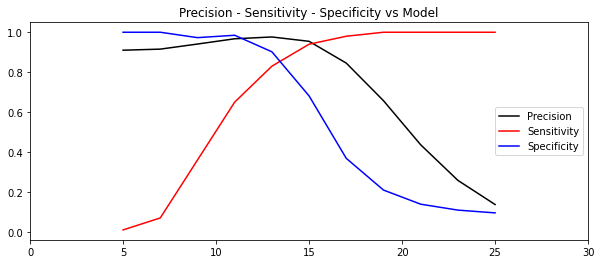

In [36]:
plt.figure(figsize=[10,4])
plt.xlim([0,30])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.show()



## Distribuciones muy pegadas

In [37]:
total_p = 1000
total_n = 1000
px = [np.random.normal(13,3) for _ in range(total_p)]
nx = [np.random.normal(17,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

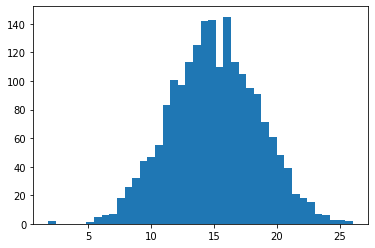

In [38]:
plt.hist(x,bins=40)
plt.show()

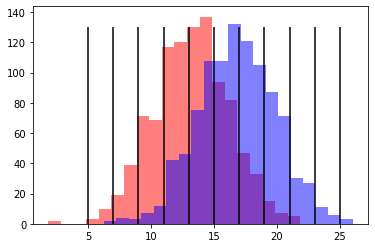

In [39]:
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
for t in thresholds:
    plt.vlines(t, 0, 130)

plt.show()

In [40]:
predictions = [model(x,threshold=t) for t in thresholds]
accuracies = [accuracy(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
recalls = [recall(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
specificities = [specificity(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
    

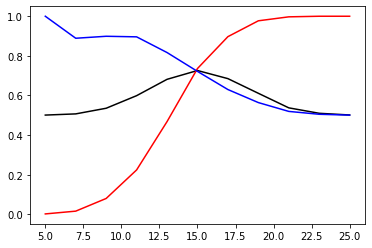

In [41]:
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.show()



# Un modelo "real"



Ahora probamos con un modelo entrenado como una regresión lineal

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
total_p = 1000
total_n = 1000
px = [np.random.normal(10,3) for _ in range(total_p)] 
nx = [np.random.normal(20,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

In [44]:
lr = LogisticRegression()
lr = lr.fit(x.reshape(-1,1),classes)



Ahora predecimos con él

In [45]:
predicted_classes = lr.predict(x.reshape(-1,1))

In [46]:
accuracy(classes=classes,predicted=predicted_classes,positive_class="p")

0.9515

In [47]:
recall(classes=classes,predicted=predicted_classes,positive_class="p")

0.952

In [48]:
specificity(classes=classes,predicted=predicted_classes,positive_class="p")

0.951048951048951



## Sensibilidad en los modelos



Por defecto, la probabilidad > .5 se asigna a la primera clase. Pero podemos elegir el umbral que queramos, si interpretamos la salida como probabilidades y elegimos varios umbrales, para ver como respoden.

In [49]:
predicted_classes_proba = lr.predict_proba(x.reshape(-1,1))

n_proba, p_proba = zip(*predicted_classes_proba)

In [50]:
print(classes[0:10])
print(x[0:10])
print(p_proba[0:10])

['p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p']
[ 9.76597271 13.93837072 13.5185189  10.61021097 10.39357973 10.65487287
  9.9719083  11.10581334  7.53848987 10.9468205 ]
(0.9964847825982531, 0.7723875805508439, 0.8411943463399302, 0.9914371654966587, 0.9931829342373232, 0.9910255210724288, 0.9956304450397093, 0.985600861524407, 0.9996678609982943, 0.9878080512605081)


In [51]:
np.array(n_proba)+np.array(p_proba)

array([1., 1., 1., ..., 1., 1., 1.])



La probabilidad asignada para cada x serán las siguientes

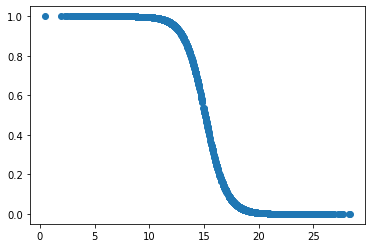

In [52]:
plt.scatter(x, p_proba)
plt.show()



Creemos modelos del .1 al .9 de umbral de probabilidad, y comprobemos sus evaluaciones

In [53]:
thresholds = np.arange(1,10)[::-1]/10
thresholds

array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

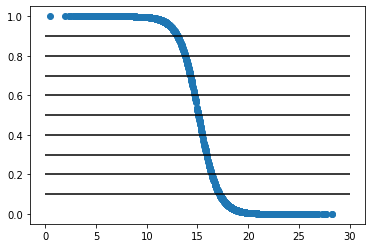

In [54]:
plt.scatter(x, p_proba)
plt.hlines(thresholds,0,30)
plt.show()



Para cada threshold, tenemos un modelo, de manera que podemos discernir que clasificación ha hecho, aplicando el filtro del umbral.

In [55]:
predictions_model0 = p_proba>thresholds[0]
predictions_model0 = list(map(lambda x: "p" if x else "n",predictions_model0))



Para todos los modelos

In [56]:
print(thresholds)
predictions = [np.array(list(map(lambda x: "p" if x else "n", p_proba > t_ ))) for t_ in thresholds ]

[0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


In [57]:
accuracies = [accuracy(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
recalls = [recall(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
specificities = [specificity(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]

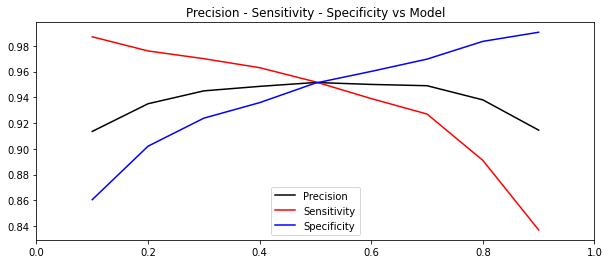

In [58]:
plt.figure(figsize=[10,4])
plt.xlim([0,1])
#plt.ylim([0,1])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.show()



## Más sensibilidad

In [59]:
thresholds = np.arange(0,1000,10)[::-1]/1000
predictions = [np.array(list(map(lambda x: "p" if x else "n", p_proba > t_ ))) for t_ in thresholds ]

accuracies = [accuracy(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
recalls = [recall(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
specificities = [specificity(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]

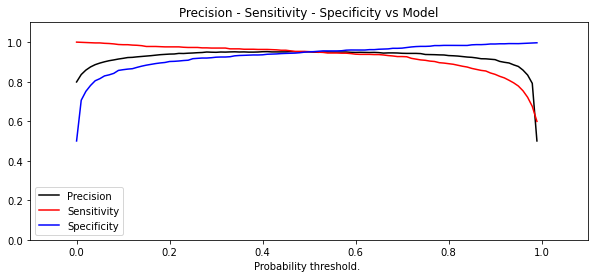

In [60]:
plt.figure(figsize=[10,4])
plt.xlim([-.1,1.1])
plt.ylim([0,1.1])
plt.plot(thresholds[::-1],accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.xlabel("Probability threshold. ")
plt.show()



## Distribuciones desequilibradas

In [61]:
total_p = 100
total_n = 1000
px = [np.random.normal(10,3) for _ in range(total_p)]
nx = [np.random.normal(20,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

In [62]:
lr = LogisticRegression()
lr = lr.fit(x.reshape(-1,1),classes)

predicted_classes_proba = lr.predict_proba(x.reshape(-1,1))

n_proba, p_proba = zip(*predicted_classes_proba)

In [63]:
thresholds = np.arange(0,1000,10)[::-1]/1000
predictions = [np.array(list(map(lambda x: "p" if x else "n", p_proba > t_ ))) for t_ in thresholds ]

accuracies = [accuracy(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
recalls = [recall(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
specificities = [specificity(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]

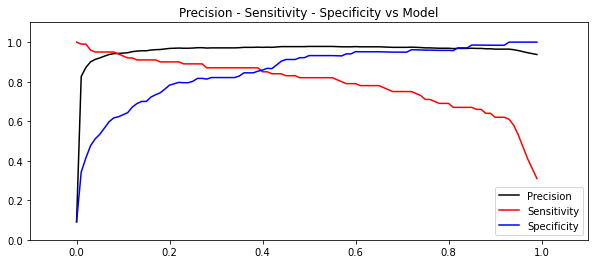

In [64]:
plt.figure(figsize=[10,4])
plt.xlim([-.1,1.1])
plt.ylim([0,1.1])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.show()

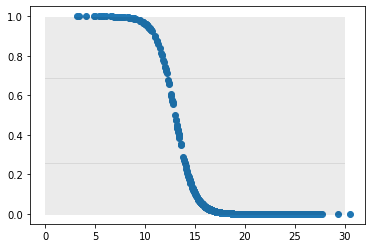

In [65]:
plt.scatter(x, p_proba)
plt.hlines(thresholds, 0, 30, alpha=0.1)
plt.show()



## Distribuciones muy pegadas

In [66]:
total_p = 1000
total_n = 1000
px = [np.random.normal(13,3) for _ in range(total_p)]
nx = [np.random.normal(17,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

In [67]:
lr = LogisticRegression()
lr = lr.fit(x.reshape(-1,1),classes)

predicted_classes_proba = lr.predict_proba(x.reshape(-1,1))

n_proba, p_proba = zip(*predicted_classes_proba)

In [68]:
thresholds = np.arange(0,1000,10)[::-1]/1000
predictions = [np.array(list(map(lambda x: "p" if x else "n", p_proba > t_ ))) for t_ in thresholds ]

accuracies = [accuracy(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
recalls = [recall(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
specificities = [specificity(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]

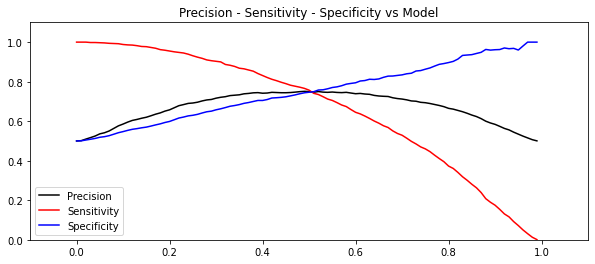

In [69]:
plt.figure(figsize=[10,4])
plt.xlim([-.1,1.1])
plt.ylim([0,1.1])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.show()